In [13]:
def testing_creating_directory(path):
    if os.path.exists(path)==False:
       os.mkdir(path)

import os
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/pytorch/'


##creating main folder
testing_creating_directory(path)
##change directory
os.chdir(path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Mon Sep  9 19:49:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-jqgu5dc8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-jqgu5dc8
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5b72c27ae39f99db75d43f18fd1312e1ea934e60
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [4]:
# COMMON LIBRARIES
import os
import cv2

from datetime import datetime
from google.colab.patches import cv2_imshow

# DATA SET PREPARATION AND LOADING
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# VISUALIZATION
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

# CONFIGURATION
from detectron2 import model_zoo
from detectron2.config import get_cfg

# EVALUATION
from detectron2.engine import DefaultPredictor

# TRAINING
from detectron2.engine import DefaultTrainer

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sDHrdDWd5USqSBR0E7on")
project = rf.workspace("medusas").project("alitas-tcc_h")
dataset = project.version(11).download("coco")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...


In [6]:
DATA_SET_NAME = dataset.name.replace(" ", "-")
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"

In [7]:
# TRAIN SET
TRAIN_DATA_SET_NAME = f"{DATA_SET_NAME}-train"
TRAIN_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "train")
TRAIN_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "train", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TRAIN_DATA_SET_NAME,
    metadata={},
    json_file=TRAIN_DATA_SET_ANN_FILE_PATH,
    image_root=TRAIN_DATA_SET_IMAGES_DIR_PATH
)

# TEST SET
TEST_DATA_SET_NAME = f"{DATA_SET_NAME}-test"
TEST_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "test")
TEST_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "test", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TEST_DATA_SET_NAME,
    metadata={},
    json_file=TEST_DATA_SET_ANN_FILE_PATH,
    image_root=TEST_DATA_SET_IMAGES_DIR_PATH
)

# VALID SET
VALID_DATA_SET_NAME = f"{DATA_SET_NAME}-valid"
VALID_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "valid")
VALID_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "valid", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=VALID_DATA_SET_NAME,
    metadata={},
    json_file=VALID_DATA_SET_ANN_FILE_PATH,
    image_root=VALID_DATA_SET_IMAGES_DIR_PATH
)

In [8]:
[
    data_set
    for data_set
    in MetadataCatalog.list()
    if data_set.startswith(DATA_SET_NAME)
]

['Alitas---TCC_H-train', 'Alitas---TCC_H-test', 'Alitas---TCC_H-valid']

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



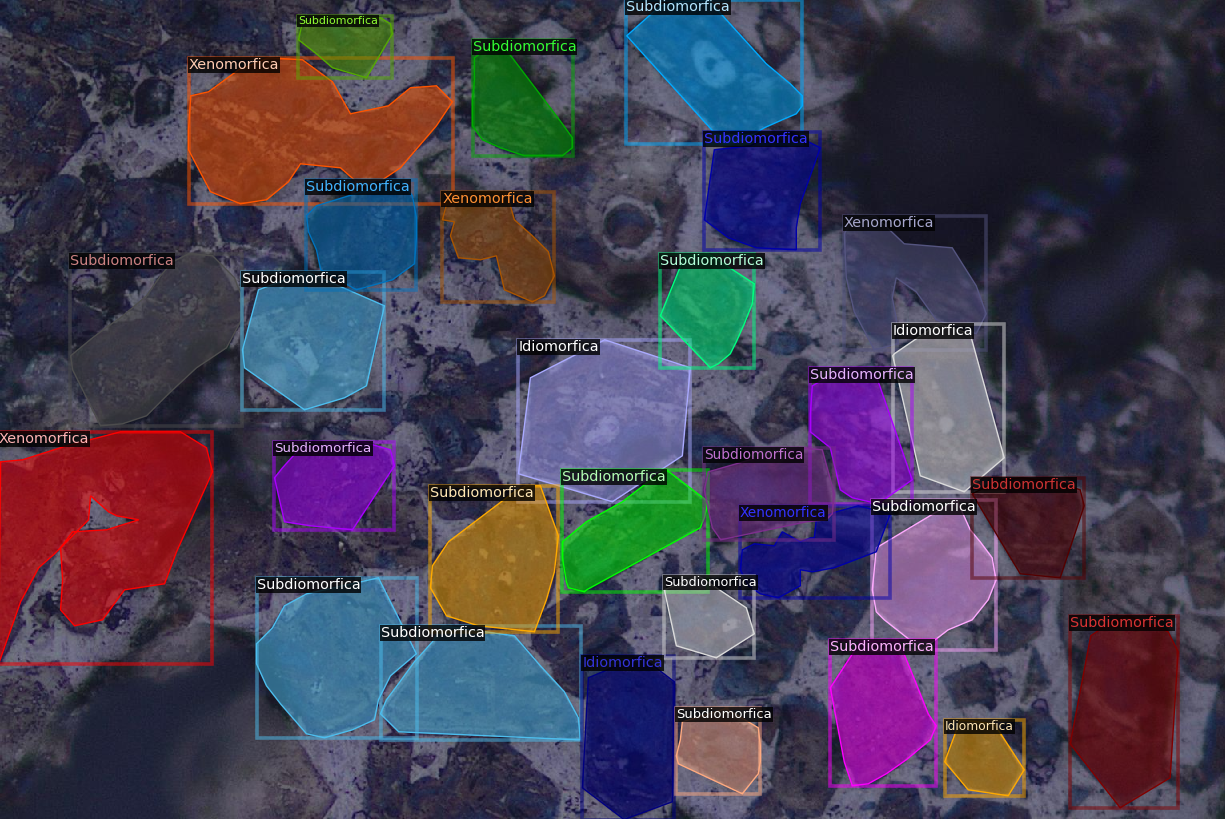

In [ ]:
metadata = MetadataCatalog.get(TRAIN_DATA_SET_NAME)
dataset_train = DatasetCatalog.get(TRAIN_DATA_SET_NAME)

dataset_entry = dataset_train[0]
image = cv2.imread(dataset_entry["file_name"])

visualizer = Visualizer(
    image[:, :, ::-1],
    metadata=metadata,
    scale=0.8,
    instance_mode=ColorMode.IMAGE_BW
)

out = visualizer.draw_dataset_dict(dataset_entry)
cv2_imshow(out.get_image()[:, :, ::-1])

In [9]:
# HYPERPARAMETERS
ARCHITECTURE = "mask_rcnn_R_101_FPN_3x"
CONFIG_FILE_PATH = f"COCO-InstanceSegmentation/{ARCHITECTURE}.yaml"
MAX_ITER = 1000
EVAL_PERIOD = 200
BASE_LR = 0.001
NUM_CLASSES = 3

# OUTPUT DIR
OUTPUT_DIR_PATH = os.path.join(
    DATA_SET_NAME,
    ARCHITECTURE,
    datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
)

os.makedirs(OUTPUT_DIR_PATH, exist_ok=True)

In [10]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE_PATH))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(CONFIG_FILE_PATH)
cfg.DATASETS.TRAIN = (TRAIN_DATA_SET_NAME,)
cfg.DATASETS.TEST = (TEST_DATA_SET_NAME,)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.TEST.EVAL_PERIOD = EVAL_PERIOD
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.INPUT.MASK_FORMAT='bitmask'
cfg.SOLVER.BASE_LR = BASE_LR
cfg.SOLVER.MAX_ITER = MAX_ITER
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES
cfg.OUTPUT_DIR = OUTPUT_DIR_PATH


In [14]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/09 20:14:36 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


[09/09 20:14:53 d2.utils.events]:  eta: 0:12:39  iter: 19  total_loss: 0.5287  loss_cls: 0.1876  loss_box_reg: 0.1797  loss_mask: 0.1119  loss_rpn_cls: 0.009948  loss_rpn_loc: 0.0347    time: 0.7599  last_time: 0.7431  data_time: 0.0751  last_data_time: 0.0116   lr: 1.9981e-05  max_mem: 3604M
[09/09 20:15:07 d2.utils.events]:  eta: 0:11:53  iter: 39  total_loss: 0.4974  loss_cls: 0.1613  loss_box_reg: 0.1499  loss_mask: 0.1103  loss_rpn_cls: 0.006826  loss_rpn_loc: 0.03031    time: 0.7281  last_time: 0.6617  data_time: 0.0198  last_data_time: 0.0158   lr: 3.9961e-05  max_mem: 3604M
[09/09 20:15:21 d2.utils.events]:  eta: 0:11:34  iter: 59  total_loss: 0.5072  loss_cls: 0.1898  loss_box_reg: 0.1641  loss_mask: 0.1186  loss_rpn_cls: 0.009907  loss_rpn_loc: 0.02788    time: 0.7164  last_time: 0.6527  data_time: 0.0230  last_data_time: 0.0179   lr: 5.9941e-05  max_mem: 3604M
[09/09 20:15:34 d2.utils.events]:  eta: 0:10:55  iter: 79  total_loss: 0.517  loss_cls: 0.2023  loss_box_reg: 0.169 

In [15]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.34
predictor = DefaultPredictor(cfg)

[09/09 20:26:33 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from Alitas---TCC_H/mask_rcnn_R_101_FPN_3x/2024-09-09-19-54-36/model_final.pth ...


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


In [16]:
dataset_valid = DatasetCatalog.get(VALID_DATA_SET_NAME)

for d in dataset_valid:
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)

    visualizer = Visualizer(
        img[:, :, ::-1],
        metadata=metadata,
        scale=0.8,
        instance_mode=ColorMode.IMAGE_BW
    )
    out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

[09/09 20:27:04 d2.data.datasets.coco]: Loading /content/drive/MyDrive/pytorch/Alitas---TCC_H-11/valid/_annotations.coco.json takes 1.91 seconds.
WARNING [09/09 20:27:04 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/09 20:27:04 d2.data.datasets.coco]: Loaded 20 images in COCO format from /content/drive/MyDrive/pytorch/Alitas---TCC_H-11/valid/_annotations.coco.json


NameError: name 'metadata' is not defined

In [17]:
import os
import json
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from collections import defaultdict

# Função para obter classes de objetos a partir do arquivo de anotações
def get_classes_from_annotations(ann_file_path):
    if not os.path.exists(ann_file_path):
        raise FileNotFoundError(f"Arquivo de anotações não encontrado: {ann_file_path}")
    with open(ann_file_path) as f:
        annotations = json.load(f)
    categories = annotations["categories"]
    classes = [category["name"] for category in categories]
    return classes

# Função para calcular IoU
def compute_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

# Função para calcular Dice Coefficient
def compute_dice(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    dice = 2. * np.sum(intersection) / (np.sum(gt_mask) + np.sum(pred_mask))
    return dice

# Função para converter segmentações em máscaras binárias
def segmentation_to_mask(segmentation, height, width):
    mask = np.zeros((height, width), dtype=np.uint8)
    for polygon in segmentation:
        polygon = np.array(polygon, dtype=np.int32).reshape((-1, 2))
        cv2.fillPoly(mask, [polygon], 1)
    return mask.astype(bool)

# Caminhos para os arquivos de anotação e diretórios de imagem
DATA_SET_NAME = dataset.name.replace(" ", "-")
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"
test_ann_file_path = os.path.join(dataset.location, "test", ANNOTATIONS_FILE_NAME)
test_images_root = os.path.join(dataset.location, "test")

# Nomes dos datasets
TEST_DATA_SET_NAME = f"{DATA_SET_NAME}-test"

# Registrar dataset de teste
from detectron2.data.datasets import register_coco_instances
register_coco_instances(TEST_DATA_SET_NAME, {}, test_ann_file_path, test_images_root)

# Obter classes de objetos a partir do arquivo de anotações de teste
classes = get_classes_from_annotations(test_ann_file_path)
MetadataCatalog.get(TEST_DATA_SET_NAME).thing_classes = classes

# Configuração do modelo
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # Substitua pelo caminho correto para os pesos treinados
cfg.DATASETS.TRAIN = ()
cfg.DATASETS.TEST = (TEST_DATA_SET_NAME,)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.TEST.EVAL_PERIOD = 500
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.INPUT.MASK_FORMAT = 'bitmask'
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
cfg.OUTPUT_DIR = "./output"

# Configurar o avaliador COCO
evaluator = COCOEvaluator(TEST_DATA_SET_NAME, cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, TEST_DATA_SET_NAME)

# Avaliar o modelo usando COCOEvaluator
metrics = inference_on_dataset(DefaultPredictor(cfg).model, val_loader, evaluator)
print("Métricas do COCOEvaluator:", metrics)

# Avaliar o modelo manualmente
predictor = DefaultPredictor(cfg)

# Listas para armazenar classes verdadeiras, predições e métricas
gt_classes = []
pred_classes = []
ious = []
dice_coefficients = []

# Dicionário para armazenar métricas por categoria
category_metrics = defaultdict(lambda: {'tp': 0, 'fp': 0, 'fn': 0, 'tn': 0, 'num_gt': 0, 'num_pred': 0})

# Iterar sobre o dataset de teste e fazer predições
for dataset_dict in DatasetCatalog.get(TEST_DATA_SET_NAME):
    img = cv2.imread(dataset_dict["file_name"])
    outputs = predictor(img)
    instances = outputs["instances"]

    # Obter classes verdadeiras e predições para a imagem atual
    gt_classes_image = []
    pred_classes_image = []
    ious_image = []
    dice_coefficients_image = []

    for ann in dataset_dict["annotations"]:
        gt_mask = segmentation_to_mask(ann["segmentation"], img.shape[0], img.shape[1])
        gt_class_id = ann["category_id"]
        category_metrics[gt_class_id]['num_gt'] += 1

        # Encontrar a melhor predição correspondente (maior IoU)
        best_iou = 0.0
        best_pred_idx = -1
        best_dice = 0.0

        for i, pred_mask in enumerate(instances.pred_masks):
            pred_mask = pred_mask.cpu().numpy()
            if gt_mask.shape == pred_mask.shape:
                iou = compute_iou(gt_mask, pred_mask)
                if iou > best_iou:
                    best_iou = iou
                    best_pred_idx = i
                    best_dice = compute_dice(gt_mask, pred_mask)

        if best_pred_idx != -1:
            pred_class_id = instances.pred_classes[best_pred_idx].item()
            gt_classes_image.append(gt_class_id)
            pred_classes_image.append(pred_class_id)
            ious_image.append(best_iou)
            dice_coefficients_image.append(best_dice)

            category_metrics[pred_class_id]['num_pred']+=1

            # Atualizar métricas por categoria
          #xeno == xeno
            if gt_class_id == pred_class_id:
                category_metrics[gt_class_id]['tp'] += 1
            else:
                category_metrics[gt_class_id]['fn'] += 1
                category_metrics[pred_class_id]['fp'] += 1
        else:
            category_metrics[gt_class_id]['fn'] += 1
            # cristal_n_obs += 1



    # Adicionar classes e métricas da imagem atual às listas principais
    gt_classes.extend(gt_classes_image)
    pred_classes.extend(pred_classes_image)
    ious.extend(ious_image)
    dice_coefficients.extend(dice_coefficients_image)

# Convertendo para array numpy
gt_classes = np.array(gt_classes)
pred_classes = np.array(pred_classes)

# Garantir que o comprimento seja igual
assert len(gt_classes) == len(pred_classes), "Número de classes verdadeiras e predições não corresponde."

# Calcular métricas usando sklearn
accuracy = accuracy_score(gt_classes, pred_classes)
precision = precision_score(gt_classes, pred_classes, average='weighted')
recall = recall_score(gt_classes, pred_classes, average='weighted')
f1 = f1_score(gt_classes, pred_classes, average='weighted')

# Calcular métricas de segmentação
mean_iou = np.mean(ious)
mean_dice = np.mean(dice_coefficients)

# Calcular métricas por categoria
for category_id, metrics in category_metrics.items():
    tp = metrics['tp']
    fp = metrics['fp']
    fn = metrics['fn']
    num_gt = metrics['num_gt']
    num_pred = metrics['num_pred']

    print(f"Categoria {classes[category_id]}:")
    print(f"  tp: {tp:.4f}")
    print(f"  fp: {fp:.4f}")
    print(f"  fn: {fn:.4f}")
    print(f"  num_pred: {num_pred:.4f}")
    print(f"  num_gt: {num_gt:.4f}")

    if (tp + fp) > 0:
        precision_category = tp / (tp + fp)
    else:
        precision_category = 0

    if num_gt > 0:
        recall_category = tp / num_gt
    else:
        recall_category = 0

    if (precision_category + recall_category) > 0:
        f1_category = 2 * (precision_category * recall_category) / (precision_category + recall_category)
    else:
        f1_category = 0

    accuracy_category = tp / (tp + fp + fn + max((num_gt - tp - fp - fn),0)) if (tp + fp + fn + (num_pred - tp - fp - fn)) > 0 else 0

    print(f"Categoria {classes[category_id]}:")
    print(f"  Precisão: {precision_category:.4f}")
    print(f"  Revocação: {recall_category:.4f}")
    print(f"  F1-score: {f1_category:.4f}")
    print(f"  Acurácia: {accuracy_category:.4f}")
    print(f"  IoU Médio: {np.mean(ious_image) if ious_image else 0:.4f}")
    print(f"  Coeficiente de Dice Médio: {np.mean(dice_coefficients_image) if dice_coefficients_image else 0:.4f}")

# Exibir as métricas
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"IoU Médio: {mean_iou:.4f}")
print(f"Coeficiente de Dice Médio: {mean_dice:.4f}")



WARNING [09/09 20:27:23 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [09/09 20:27:23 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/09 20:27:23 d2.data.datasets.coco]: Loaded 21 images in COCO format from /content/drive/MyDrive/pytorch/Alitas---TCC_H-11/test/_annotations.coco.json
[09/09 20:27:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/09 20:27:23 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/09 20:27:23 d2.data.common]: Serializing 21 elements to byte tensors and concatenating them all ...
[09/09 20:27:23 d2.data.common]: Serialized dataset takes 0.10 MiB
[09/09 20:27:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpo

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


[09/09 20:27:30 d2.evaluation.evaluator]: Start inference on 21 batches


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


[09/09 20:27:37 d2.evaluation.evaluator]: Inference done 11/21. Dataloading: 0.0020 s/iter. Inference: 0.1517 s/iter. Eval: 0.2920 s/iter. Total: 0.4457 s/iter. ETA=0:00:04
[09/09 20:27:41 d2.evaluation.evaluator]: Total inference time: 0:00:06.846163 (0.427885 s / iter per device, on 1 devices)
[09/09 20:27:41 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.171500 s / iter per device, on 1 devices)
[09/09 20:27:42 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/09 20:27:42 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[09/09 20:27:42 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/09 20:27:42 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/09 20:27:42 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.02 seconds.
[09/09 20:27:42 d2.evaluation.

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


WARNING [09/09 20:27:44 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/09 20:27:44 d2.data.datasets.coco]: Loaded 21 images in COCO format from /content/drive/MyDrive/pytorch/Alitas---TCC_H-11/test/_annotations.coco.json
Categoria Subdiomorfica:
  tp: 88.0000
  fp: 39.0000
  fn: 219.0000
  num_pred: 127.0000
  num_gt: 307.0000
Categoria Subdiomorfica:
  Precisão: 0.6929
  Revocação: 0.2866
  F1-score: 0.4055
  Acurácia: 0.2543
  IoU Médio: 0.8665
  Coeficiente de Dice Médio: 0.9269
Categoria Xenomorfica:
  tp: 36.0000
  fp: 73.0000
  fn: 38.0000
  num_pred: 109.0000
  num_gt: 74.0000
Categoria Xenomorfica:
  Precisão: 0.3303
  Revocação: 0.4865
  F1-score: 0.3934
  Acurácia: 0.2449
  IoU Médio: 0.8665
  Coeficiente de Dice Médio: 0.9269
Categoria Idiomorfica:
  tp: 18.0000
  fp: 149.0000
  fn: 26.0000
  num_pred: 167.0000
  num_gt: 44.0000
Categoria Idiomorfica:
  Precisão: 0.1078
  Revocação: 0.4091
  F1-score: 0.1

In [18]:
from collections import defaultdict
import numpy as np
import cv2
import json
import os
from detectron2.engine import DefaultPredictor
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Função para calcular IoU
def compute_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0
    return iou

# Função para calcular Dice Coefficient
def compute_dice(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    dice = 2. * np.sum(intersection) / (np.sum(gt_mask) + np.sum(pred_mask)) if (np.sum(gt_mask) + np.sum(pred_mask)) > 0 else 0
    return dice

# Função para converter segmentações em máscaras binárias
def segmentation_to_mask(segmentation, height, width):
    mask = np.zeros((height, width), dtype=np.uint8)
    for polygon in segmentation:
        polygon = np.array(polygon, dtype=np.int32).reshape((-1, 2))
        cv2.fillPoly(mask, [polygon], 1)
    return mask.astype(bool)

# Configuração do modelo e caminhos
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # Substitua pelo caminho correto para os pesos treinados
cfg.DATASETS.TRAIN = ()
cfg.DATASETS.TEST = (TEST_DATA_SET_NAME,)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.TEST.EVAL_PERIOD = 500
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.INPUT.MASK_FORMAT = 'bitmask'
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
cfg.OUTPUT_DIR = "./output"

# Configurar o avaliador COCO
evaluator = COCOEvaluator(TEST_DATA_SET_NAME, cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, TEST_DATA_SET_NAME)

# Avaliar o modelo usando COCOEvaluator
metrics = inference_on_dataset(DefaultPredictor(cfg).model, val_loader, evaluator)
print("Métricas do COCOEvaluator:", metrics)

# Avaliar o modelo manualmente
predictor = DefaultPredictor(cfg)

# Dicionário para armazenar métricas por categoria
category_metrics = defaultdict(lambda: {'iou': [], 'dice': [], 'tp': 0, 'fp': 0, 'fn': 0, 'num_gt': 0, 'num_pred': 0})

# Iterar sobre o dataset de teste e fazer predições
for dataset_dict in DatasetCatalog.get(TEST_DATA_SET_NAME):
    img = cv2.imread(dataset_dict["file_name"])
    outputs = predictor(img)
    instances = outputs["instances"]

    for ann in dataset_dict["annotations"]:
        gt_mask = segmentation_to_mask(ann["segmentation"], img.shape[0], img.shape[1])
        gt_class_id = ann["category_id"]
        category_metrics[gt_class_id]['num_gt'] += 1

        # Encontrar a melhor predição correspondente (maior IoU)
        best_iou = 0.0
        best_pred_idx = -1
        best_dice = 0.0

        for i, pred_mask in enumerate(instances.pred_masks):
            pred_mask = pred_mask.cpu().numpy()
            if gt_mask.shape == pred_mask.shape:
                iou = compute_iou(gt_mask, pred_mask)
                if iou > best_iou:
                    best_iou = iou
                    best_pred_idx = i
                    best_dice = compute_dice(gt_mask, pred_mask)

        if best_pred_idx != -1:
            pred_class_id = instances.pred_classes[best_pred_idx].item()
            category_metrics[gt_class_id]['num_pred'] += 1

            # Atualizar métricas por categoria
            if gt_class_id == pred_class_id:
                category_metrics[gt_class_id]['tp'] += 1
                category_metrics[gt_class_id]['iou'].append(best_iou)
                category_metrics[gt_class_id]['dice'].append(best_dice)
            else:
                category_metrics[gt_class_id]['fn'] += 1
                category_metrics[pred_class_id]['fp'] += 1
        else:
            category_metrics[gt_class_id]['fn'] += 1

# Calcular métricas por categoria
for category_id, metrics in category_metrics.items():
    tp = metrics['tp']
    fp = metrics['fp']
    fn = metrics['fn']
    num_gt = metrics['num_gt']
    num_pred = metrics['num_pred']

    iou_values = metrics['iou']
    dice_values = metrics['dice']

    print(f"Categoria {classes[category_id]}:")
    print(f"  tp: {tp:.4f}")
    print(f"  fp: {fp:.4f}")
    print(f"  fn: {fn:.4f}")
    print(f"  num_pred: {num_pred:.4f}")
    print(f"  num_gt: {num_gt:.4f}")

    if (tp + fp) > 0:
        precision_category = tp / (tp + fp)
    else:
        precision_category = 0

    if num_gt > 0:
        recall_category = tp / num_gt
    else:
        recall_category = 0

    if (precision_category + recall_category) > 0:
        f1_category = 2 * (precision_category * recall_category) / (precision_category + recall_category)
    else:
        f1_category = 0

    accuracy_category = tp / (tp + fp + fn + max((num_gt - tp - fp - fn),0)) if (tp + fp + fn + (num_pred - tp - fp - fn)) > 0 else 0

    print(f"Categoria {classes[category_id]}:")
    print(f"  Precisão: {precision_category:.4f}")
    print(f"  Revocação: {recall_category:.4f}")
    print(f"  F1-score: {f1_category:.4f}")
    print(f"  Acurácia: {accuracy_category:.4f}")
    print(f"  IoU Médio: {np.mean(iou_values) if iou_values else 0:.4f}")
    print(f"  Coeficiente de Dice Médio: {np.mean(dice_values) if dice_values else 0:.4f}")

# Exibir as métricas gerais
gt_classes = np.array([ann["category_id"] for dataset_dict in DatasetCatalog.get(TEST_DATA_SET_NAME) for ann in dataset_dict["annotations"]])
pred_classes = np.array([instances.pred_classes[best_pred_idx].item() for dataset_dict in DatasetCatalog.get(TEST_DATA_SET_NAME) for instances in [predictor(cv2.imread(dataset_dict["file_name"]))["instances"]] if best_pred_idx != -1])

# Calcular métricas gerais usando sklearn
accuracy = accuracy_score(gt_classes, pred_classes)
precision = precision_score(gt_classes, pred_classes, average='weighted')
recall = recall_score(gt_classes, pred_classes, average='weighted')
f1 = f1_score(gt_classes, pred_classes, average='weighted')

# Calcular métricas de segmentação gerais
mean_iou = np.mean([iou for metrics in category_metrics.values() for iou in metrics['iou']])
mean_dice = np.mean([dice for metrics in category_metrics.values() for dice in metrics['dice']])

# Exibir métricas gerais
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"IoU Médio: {mean_iou:.4f}")
print(f"Coeficiente de Dice Médio: {mean_dice:.4f}")


WARNING [09/09 20:45:57 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [09/09 20:45:57 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/09 20:45:57 d2.data.datasets.coco]: Loaded 21 images in COCO format from /content/drive/MyDrive/pytorch/Alitas---TCC_H-11/test/_annotations.coco.json
[09/09 20:45:57 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/09 20:45:57 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[09/09 20:45:57 d2.data.common]: Serializing 21 elements to byte tensors and concatenating them all ...
[09/09 20:45:57 d2.data.common]: Serialized dataset takes 0.10 MiB
[09/09 20:46:00 d2.checkpoint.detection_checkpoint]: [DetectionCheckpo

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


[09/09 20:46:02 d2.evaluation.evaluator]: Start inference on 21 batches


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


[09/09 20:46:07 d2.evaluation.evaluator]: Inference done 11/21. Dataloading: 0.0024 s/iter. Inference: 0.1472 s/iter. Eval: 0.1816 s/iter. Total: 0.3312 s/iter. ETA=0:00:03
[09/09 20:46:10 d2.evaluation.evaluator]: Total inference time: 0:00:04.713681 (0.294605 s / iter per device, on 1 devices)
[09/09 20:46:10 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.143594 s / iter per device, on 1 devices)
[09/09 20:46:10 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/09 20:46:10 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[09/09 20:46:10 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/09 20:46:10 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/09 20:46:10 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[09/09 20:46:10 d2.evaluation.

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


WARNING [09/09 20:46:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/09 20:46:11 d2.data.datasets.coco]: Loaded 21 images in COCO format from /content/drive/MyDrive/pytorch/Alitas---TCC_H-11/test/_annotations.coco.json
Categoria Subdiomorfica:
  tp: 88.0000
  fp: 39.0000
  fn: 219.0000
  num_pred: 289.0000
  num_gt: 307.0000
Categoria Subdiomorfica:
  Precisão: 0.6929
  Revocação: 0.2866
  F1-score: 0.4055
  Acurácia: 0.2543
  IoU Médio: 0.7863
  Coeficiente de Dice Médio: 0.8537
Categoria Xenomorfica:
  tp: 36.0000
  fp: 73.0000
  fn: 38.0000
  num_pred: 70.0000
  num_gt: 74.0000
Categoria Xenomorfica:
  Precisão: 0.3303
  Revocação: 0.4865
  F1-score: 0.3934
  Acurácia: 0.2449
  IoU Médio: 0.6448
  Coeficiente de Dice Médio: 0.7484
Categoria Idiomorfica:
  tp: 18.0000
  fp: 149.0000
  fn: 26.0000
  num_pred: 44.0000
  num_gt: 44.0000
Categoria Idiomorfica:
  Precisão: 0.1078
  Revocação: 0.4091
  F1-score: 0.170

ValueError: Found input variables with inconsistent numbers of samples: [425, 0]